In [1]:
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
from scipy import constants as const
from scipy.integrate import simps
from scipy.optimize import minimize
from findiff import FinDiff, coefficients, Coefficient

In [2]:
def create_weights(n_hidden, n_neurons):
    weights_1 = np.random.rand(1, n_neurons)
    weights_last = np.random.rand(n_neurons, 1)
    weights_hidden = [np.random.rand(n_neurons, n_neurons) for i in range(n_hidden - 1)]
    weights_hidden.insert(0, weights_1)
    weights_hidden.append(weights_last)
    return weights_hidden
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
def forward(weights_hidden, x):
    weights_hidedden = un_flatten(weights_hidden)
    for weight_array in weights_hidden:
        x = np.dot(x, weight_array)
        x = tanh(x)
    return x

In [3]:
def flatten(c):
    c_flat = []
    shapes = []
    lengths = []
    for i in c:
        shapes.append(np.shape(i))
        c_flat += list(i.flatten())
        lengths.append(i.size)
    return c_flat, shapes, lengths

In [4]:
def un_flatten(c):
    c_flat, shapes, lengths = flatten(c)
    c_unflat = []
    for i in range(len(shapes)):
        c_unflat.append(np.reshape(c_flat[:lengths[i]], shapes[i]))
        del c_flat[:lengths[i]]
    return c_unflat

In [5]:
def psi_n(c, x):
    def integral(c, x):
        integral = (forward(c, x) ** 2)
        return integral
    A = (simps(integral(c, x), x)) ** -0.5
    psi_n = A * forward(c, x)
    psi_n[0] = 0
    psi_n[-1] = 0
    return psi_n

In [6]:
def d2psi_n_dx2(c, x):
    dx = x[1] - x[0]
    d2_dx2 = FinDiff(0, dx, 2)
    d2psi_n_dx2 = d2_dx2(psi_n(c, x))
    return d2psi_n_dx2

In [7]:
def V(c, x, L):
    V = []
    for i in x:
        if 0 < i and i < L:
            V.append(0)
        else:
            V.append(50)
    return V

In [8]:
# def E(c, x, L):
#     E = []
#     for i in x:
#         E.append((const.hbar ** 2) / (2 * const.m_e)) * (d2psi_n_dx2(c, i) / psi_n(c, i)) + V(c, i, L)
#     # I might need a negative above
#     return np.array(E)

In [9]:
def E(c, x, L):
    E = ((1) / (2)) * (d2psi_n_dx2(c, x) / (psi_n(c, x) + 1e-9)) + V(c, x, L)
    # I might need a negative above
    return E

In [10]:
def energy_function(c_flat):
    c = un_flatten(c_flat)
    true_energy = ((2 * np.pi) ** 2) / (8 * L ** 2)
    return E(c, x, L)[0] - true_energy

In [11]:
L = 10
x = np.linspace(0, L, 1000)

true_energy = ((2 * np.pi) ** 2) / (8 * L ** 2)

In [12]:
c = create_weights(0, 2)
forward(c, np.array([1]))

array([0.32060617])

In [13]:
c = flatten(c)[0]

res = minimize(energy_function, c)

c = un_flatten(res.x)

energy = E(c, x, L)

# Print the ground state energy and corresponding coefficients
print("True ground state energy:", true_energy)
print("Ground state energy:", np.min(energy))
print("Optimized coefficients:", res.x)

True ground state energy: 0.04934802200544679
Ground state energy: -3464743104598.3936
Optimized coefficients: [0.51246019 0.72001144 0.55969731 0.11058855]


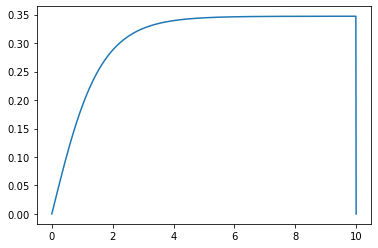

In [14]:
plt.plot(x, psi_n(res.x, x))